In [4]:
# Importing libraries

from __future__ import print_function
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import classification_report
from sklearn import metrics
from sklearn import tree
import warnings
warnings.filterwarnings('ignore')

In [5]:
df = pd.read_csv('C:/Users/jaina/OneDrive/Desktop/1222/project/Data-processed/crop_recommendation.csv')

In [6]:
dt=df

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2200 entries, 0 to 2199
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   N            2200 non-null   int64  
 1   P            2200 non-null   int64  
 2   K            2200 non-null   int64  
 3   temperature  2200 non-null   float64
 4   humidity     2200 non-null   float64
 5   ph           2200 non-null   float64
 6   rainfall     2200 non-null   float64
 7   label        2200 non-null   object 
dtypes: float64(4), int64(3), object(1)
memory usage: 137.6+ KB


In [8]:
df.tail()

,N,P,K,temperature,humidity,ph,rainfall,label
2195,107,34,32,26.774637,66.413269,6.780064,177.774507,coffee
2196,99,15,27,27.417112,56.636362,6.086922,127.924610,coffee
2197,118,33,30,24.131797,67.225123,6.362608,173.322839,coffee
2198,117,32,34,26.272418,52.127394,6.758793,127.175293,coffee
2199,104,18,30,23.603016,60.396475,6.779833,140.937041,coffee


In [9]:
df.size

17600

In [10]:
df.shape

(2200, 8)

In [11]:
df.columns

Index(['N', 'P', 'K', 'temperature', 'humidity', 'ph', 'rainfall', 'label'], dtype='object')

In [12]:
df['label'].unique()

array(['rice', 'maize', 'chickpea', 'kidneybeans', 'pigeonpeas',
       'mothbeans', 'mungbean', 'blackgram', 'lentil', 'pomegranate',
       'banana', 'mango', 'grapes', 'watermelon', 'muskmelon', 'apple',
       'orange', 'papaya', 'coconut', 'cotton', 'jute', 'coffee'],
      dtype=object)

In [13]:
df.dtypes

N                int64
P                int64
K                int64
temperature    float64
humidity       float64
ph             float64
rainfall       float64
label           object
dtype: object

In [14]:
df['label'].value_counts()

label
rice           100
maize          100
jute           100
cotton         100
coconut        100
papaya         100
orange         100
apple          100
muskmelon      100
watermelon     100
grapes         100
mango          100
banana         100
pomegranate    100
lentil         100
blackgram      100
mungbean       100
mothbeans      100
pigeonpeas     100
kidneybeans    100
chickpea       100
coffee         100
Name: count, dtype: int64

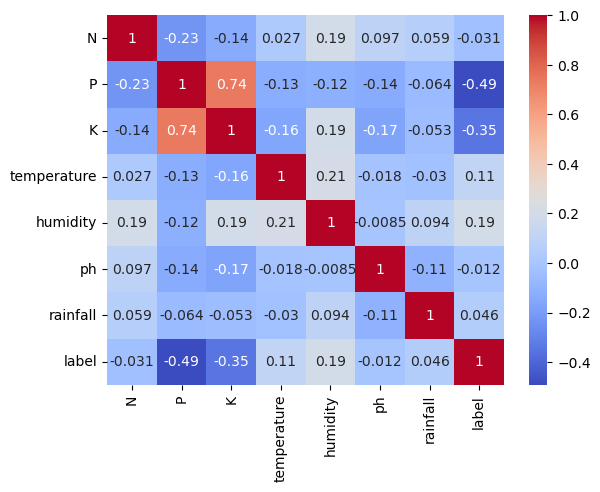

In [15]:
from sklearn.preprocessing import LabelEncoder

# Initialize the label encoder
label_encoder = LabelEncoder()

# Encode 'label' column
df['label'] = label_encoder.fit_transform(df['label'])

# Now try plotting the heatmap again
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.show()


In [16]:
mapping = dict(zip(label_encoder.classes_, range(len(label_encoder.classes_))))
print("Mapping:", mapping)

# Show encoded values
print("Encoded values:", list(zip(dt['label'], df['label'])))

Mapping: {'apple': 0, 'banana': 1, 'blackgram': 2, 'chickpea': 3, 'coconut': 4, 'coffee': 5, 'cotton': 6, 'grapes': 7, 'jute': 8, 'kidneybeans': 9, 'lentil': 10, 'maize': 11, 'mango': 12, 'mothbeans': 13, 'mungbean': 14, 'muskmelon': 15, 'orange': 16, 'papaya': 17, 'pigeonpeas': 18, 'pomegranate': 19, 'rice': 20, 'watermelon': 21}
Encoded values: [(20, 20), (20, 20), (20, 20), (20, 20), (20, 20), (20, 20), (20, 20), (20, 20), (20, 20), (20, 20), (20, 20), (20, 20), (20, 20), (20, 20), (20, 20), (20, 20), (20, 20), (20, 20), (20, 20), (20, 20), (20, 20), (20, 20), (20, 20), (20, 20), (20, 20), (20, 20), (20, 20), (20, 20), (20, 20), (20, 20), (20, 20), (20, 20), (20, 20), (20, 20), (20, 20), (20, 20), (20, 20), (20, 20), (20, 20), (20, 20), (20, 20), (20, 20), (20, 20), (20, 20), (20, 20), (20, 20), (20, 20), (20, 20), (20, 20), (20, 20), (20, 20), (20, 20), (20, 20), (20, 20), (20, 20), (20, 20), (20, 20), (20, 20), (20, 20), (20, 20), (20, 20), (20, 20), (20, 20), (20, 20), (20, 20), 

### Seperating features and target label

In [18]:
features = df[['N', 'P','K','temperature', 'humidity', 'ph', 'rainfall']]
target = df['label']
#features = df[['temperature', 'humidity', 'ph', 'rainfall']]
labels = df['label']

In [19]:
# Initialzing empty lists to append all model's name and corresponding name
acc = []
model = []

In [31]:
# Splitting into train and test data

from sklearn.model_selection import train_test_split
Xtrain, Xtest, Ytrain, Ytest = train_test_split(features,target,test_size = 0.2,random_state =2)

# Decision Tree

In [37]:
from sklearn.tree import DecisionTreeClassifier

DecisionTree = DecisionTreeClassifier(criterion="entropy",random_state=2,max_depth=5)

DecisionTree.fit(Xtrain,Ytrain)

predicted_values = DecisionTree.predict(Xtest)
x = metrics.accuracy_score(Ytest, predicted_values)
acc.append(x)
model.append('Decision Tree')
print("DecisionTrees's Accuracy is: ", x*100)

print(classification_report(Ytest,predicted_values))

DecisionTrees's Accuracy is:  90.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        13
           1       1.00      1.00      1.00        17
           2       0.59      1.00      0.74        16
           3       1.00      1.00      1.00        21
           4       0.91      1.00      0.95        21
           5       1.00      1.00      1.00        22
           6       1.00      1.00      1.00        20
           7       1.00      1.00      1.00        18
           8       0.74      0.93      0.83        28
           9       0.00      0.00      0.00        14
          10       0.68      1.00      0.81        23
          11       1.00      1.00      1.00        21
          12       1.00      1.00      1.00        26
          13       0.00      0.00      0.00        19
          14       1.00      1.00      1.00        24
          15       1.00      1.00      1.00        23
          16       1.00      1.00      1.00   

In [40]:
from sklearn.model_selection import cross_val_score

In [42]:
# Cross validation score (Decision Tree)
score = cross_val_score(DecisionTree, features, target,cv=5)

In [44]:
score

array([0.93636364, 0.90909091, 0.91818182, 0.87045455, 0.93636364])

### Saving trained Decision Tree model

In [53]:
# import pickle
# import os

# # Absolute path to the models directory
# model_dir = 'C:/Users/jaina/OneDrive/Desktop/1222/models'

# # Check if the directory exists, and create it if it doesn't
# if not os.path.exists(model_dir):
#     os.makedirs(model_dir)

# # Path to the model file
# DT_pkl_filename = os.path.join(model_dir, 'DecisionTree.pkl')

# # Save the trained model using pickle
# with open(DT_pkl_filename, 'wb') as DT_Model_pkl:
#     pickle.dump(model, DT_Model_pkl)

# print(f'Model saved to {DT_pkl_filename}')
pickle.dump(DecisionTree,open('model.pkl','wb'))

# Guassian Naive Bayes

In [27]:
from sklearn.naive_bayes import GaussianNB

NaiveBayes = GaussianNB()

NaiveBayes.fit(Xtrain,Ytrain)

predicted_values = NaiveBayes.predict(Xtest)
x = metrics.accuracy_score(Ytest, predicted_values)
acc.append(x)
model.append('Naive Bayes')
print("Naive Bayes's Accuracy is: ", x)

print(classification_report(Ytest,predicted_values))

Naive Bayes's Accuracy is:  0.990909090909091
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        13
           1       1.00      1.00      1.00        17
           2       1.00      1.00      1.00        16
           3       1.00      1.00      1.00        21
           4       1.00      1.00      1.00        21
           5       1.00      1.00      1.00        22
           6       1.00      1.00      1.00        20
           7       1.00      1.00      1.00        18
           8       0.88      1.00      0.93        28
           9       1.00      1.00      1.00        14
          10       1.00      1.00      1.00        23
          11       1.00      1.00      1.00        21
          12       1.00      1.00      1.00        26
          13       1.00      1.00      1.00        19
          14       1.00      1.00      1.00        24
          15       1.00      1.00      1.00        23
          16       1.00      1.00  

In [28]:
# Cross validation score (NaiveBayes)
score = cross_val_score(NaiveBayes,features,target,cv=5)
score

array([0.99772727, 0.99545455, 0.99545455, 0.99545455, 0.99090909])

### Saving trained Guassian Naive Bayes model

In [51]:
import pickle
# import os

# # Absolute path to the models directory
# model_dir = 'C:/Users/jaina/OneDrive/Desktop/1222/models'

# # Check if the directory exists, and create it if it doesn't
# if not os.path.exists(model_dir):
#     os.makedirs(model_dir)

# # Path to the model file
# DT_pkl_filename = os.path.join(model_dir, 'NBClassifier.pkl')

# # Save the trained model using pickle
# pickle.dump(NaiveBayes,open('model.pkl','wb'))

# print(f'Model saved to {DT_pkl_filename}')


# Support Vector Machine (SVM)

In [32]:
from sklearn.svm import SVC
# data normalization with sklearn
from sklearn.preprocessing import MinMaxScaler
# fit scaler on training data
norm = MinMaxScaler().fit(Xtrain)
X_train_norm = norm.transform(Xtrain)
# transform testing dataabs
X_test_norm = norm.transform(Xtest)
SVM = SVC(kernel='poly', degree=3, C=1)
SVM.fit(X_train_norm,Ytrain)
predicted_values = SVM.predict(X_test_norm)
x = metrics.accuracy_score(Ytest, predicted_values)
acc.append(x)
model.append('SVM')
print("SVM's Accuracy is: ", x)

print(classification_report(Ytest,predicted_values))

SVM's Accuracy is:  0.9795454545454545
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        13
           1       1.00      1.00      1.00        17
           2       1.00      1.00      1.00        16
           3       1.00      1.00      1.00        21
           4       1.00      1.00      1.00        21
           5       1.00      0.95      0.98        22
           6       0.95      1.00      0.98        20
           7       1.00      1.00      1.00        18
           8       0.83      0.89      0.86        28
           9       1.00      1.00      1.00        14
          10       1.00      1.00      1.00        23
          11       1.00      0.95      0.98        21
          12       1.00      1.00      1.00        26
          13       1.00      1.00      1.00        19
          14       1.00      1.00      1.00        24
          15       1.00      1.00      1.00        23
          16       1.00      1.00      1.0

In [33]:
# Cross validation score (SVM)
score = cross_val_score(SVM,features,target,cv=5)
score

array([0.97954545, 0.975     , 0.98863636, 0.98863636, 0.98181818])

In [34]:
#Saving trained SVM model

In [35]:
import pickle
import os

# Absolute path to the models directory
model_dir = 'C:/Users/jaina/OneDrive/Desktop/1222/models'

# Check if the directory exists, and create it if it doesn't
if not os.path.exists(model_dir):
    os.makedirs(model_dir)

# Path to the model file
DT_pkl_filename = os.path.join(model_dir, 'SVMClassifier.pkl')

# Save the trained model using pickle
with open(DT_pkl_filename, 'wb') as DT_Model_pkl:
    pickle.dump(model, DT_Model_pkl)

print(f'Model saved to {DT_pkl_filename}')


Model saved to C:/Users/jaina/OneDrive/Desktop/1222/models\SVMClassifier.pkl


# Logistic Regression

In [37]:
from sklearn.linear_model import LogisticRegression

LogReg = LogisticRegression(random_state=2)

LogReg.fit(Xtrain,Ytrain)

predicted_values = LogReg.predict(Xtest)

x = metrics.accuracy_score(Ytest, predicted_values)
acc.append(x)
model.append('Logistic Regression')
print("Logistic Regression's Accuracy is: ", x)

print(classification_report(Ytest,predicted_values))

Logistic Regression's Accuracy is:  0.9522727272727273
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        13
           1       1.00      1.00      1.00        17
           2       0.86      0.75      0.80        16
           3       1.00      1.00      1.00        21
           4       1.00      1.00      1.00        21
           5       1.00      1.00      1.00        22
           6       0.86      0.90      0.88        20
           7       1.00      1.00      1.00        18
           8       0.84      0.93      0.88        28
           9       1.00      1.00      1.00        14
          10       0.88      1.00      0.94        23
          11       0.90      0.86      0.88        21
          12       0.96      1.00      0.98        26
          13       0.84      0.84      0.84        19
          14       1.00      0.96      0.98        24
          15       1.00      1.00      1.00        23
          16       1.00   

In [38]:
# Cross validation score (Logistic Regression)
score = cross_val_score(LogReg,features,target,cv=5)
score

array([0.95      , 0.96590909, 0.94772727, 0.96590909, 0.94318182])

### Saving trained Logistic Regression model

In [40]:
import pickle
import os

# Absolute path to the models directory
model_dir = 'C:/Users/jaina/OneDrive/Desktop/1222/models'

# Check if the directory exists, and create it if it doesn't
if not os.path.exists(model_dir):
    os.makedirs(model_dir)

# Path to the model file
DT_pkl_filename = os.path.join(model_dir, 'LogisticRegression.pkl')

# Save the trained model using pickle
with open(DT_pkl_filename, 'wb') as DT_Model_pkl:
    pickle.dump(model, DT_Model_pkl)

print(f'Model saved to {DT_pkl_filename}')

Model saved to C:/Users/jaina/OneDrive/Desktop/1222/models\LogisticRegression.pkl


# Random Forest

In [42]:
from sklearn.ensemble import RandomForestClassifier

RF = RandomForestClassifier(n_estimators=20, random_state=0)
RF.fit(Xtrain,Ytrain)

predicted_values = RF.predict(Xtest)

x = metrics.accuracy_score(Ytest, predicted_values)
acc.append(x)
model.append('RF')
print("RF's Accuracy is: ", x)

print(classification_report(Ytest,predicted_values))

RF's Accuracy is:  0.990909090909091
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        13
           1       1.00      1.00      1.00        17
           2       0.94      1.00      0.97        16
           3       1.00      1.00      1.00        21
           4       1.00      1.00      1.00        21
           5       1.00      1.00      1.00        22
           6       1.00      1.00      1.00        20
           7       1.00      1.00      1.00        18
           8       0.90      1.00      0.95        28
           9       1.00      1.00      1.00        14
          10       1.00      1.00      1.00        23
          11       1.00      1.00      1.00        21
          12       1.00      1.00      1.00        26
          13       1.00      0.95      0.97        19
          14       1.00      1.00      1.00        24
          15       1.00      1.00      1.00        23
          16       1.00      1.00      1.00 

In [43]:
# Cross validation score (Random Forest)
score = cross_val_score(RF,features,target,cv=5)
score

array([0.99772727, 0.99545455, 0.99772727, 0.99318182, 0.98863636])

### Saving trained Random Forest model

In [45]:
import pickle
import os

# Absolute path to the models directory
model_dir = 'C:/Users/jaina/OneDrive/Desktop/1222/models'

# Create directory if it doesn't exist
if not os.path.exists(model_dir):
    os.makedirs(model_dir)

# Path to save model
model_path = os.path.join(model_dir, 'RandomForest.pkl')

# Save model using pickle
with open(model_path, 'wb') as file:
    pickle.dump(model, file)

print(f'Model successfully trained and saved to: {model_path}')

Model successfully trained and saved to: C:/Users/jaina/OneDrive/Desktop/1222/models\RandomForest.pkl


# XGBoost

In [47]:
import xgboost as xgb
XB = xgb.XGBClassifier()
XB.fit(Xtrain,Ytrain)

predicted_values = XB.predict(Xtest)

x = metrics.accuracy_score(Ytest, predicted_values)
acc.append(x)
model.append('XGBoost')
print("XGBoost's Accuracy is: ", x)

print(classification_report(Ytest,predicted_values))

XGBoost's Accuracy is:  0.990909090909091
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        13
           1       1.00      1.00      1.00        17
           2       1.00      1.00      1.00        16
           3       1.00      1.00      1.00        21
           4       1.00      1.00      1.00        21
           5       0.96      1.00      0.98        22
           6       1.00      1.00      1.00        20
           7       1.00      1.00      1.00        18
           8       0.93      0.96      0.95        28
           9       1.00      1.00      1.00        14
          10       0.96      1.00      0.98        23
          11       1.00      1.00      1.00        21
          12       1.00      1.00      1.00        26
          13       1.00      0.95      0.97        19
          14       1.00      1.00      1.00        24
          15       1.00      1.00      1.00        23
          16       1.00      1.00      

In [48]:
# Cross validation score (XGBoost)
score = cross_val_score(XB,features,target,cv=5)
score

array([0.99545455, 0.98863636, 0.99545455, 0.99545455, 0.98863636])

### Saving trained XGBoost model

In [50]:
import xgboost as xgb
print(xgb.__version__)

2.1.3


In [51]:

# Absolute path to the models directory
model_dir = 'C:/Users/jaina/OneDrive/Desktop/1222/models'

# Check if the directory exists, and create it if it doesn't
if not os.path.exists(model_dir):
    os.makedirs(model_dir)

# Path to the model file
DT_pkl_filename = os.path.join(model_dir, 'XGBoost.pkl')

# Save the trained model using pickle
with open(DT_pkl_filename, 'wb') as DT_Model_pkl:
    pickle.dump(model, DT_Model_pkl)

print(f'Model saved to {DT_pkl_filename}')

Model saved to C:/Users/jaina/OneDrive/Desktop/1222/models\XGBoost.pkl


## Accuracy Comparison

<Axes: title={'center': 'Accuracy Comparison'}, xlabel='Accuracy', ylabel='Algorithm'>

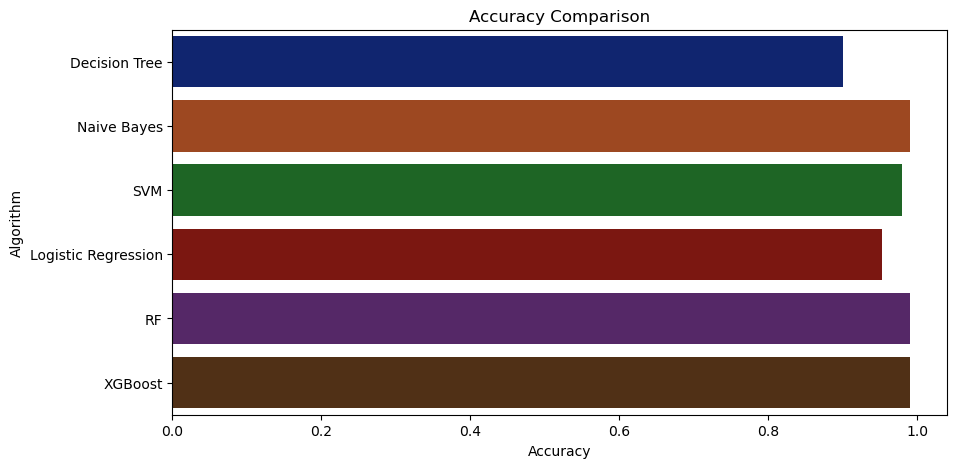

In [53]:
plt.figure(figsize=[10,5],dpi = 100)
plt.title('Accuracy Comparison')
plt.xlabel('Accuracy')
plt.ylabel('Algorithm')
sns.barplot(x = acc,y = model,palette='dark')

In [54]:
# Step 1: Create the dictionary
accuracy_models = dict(zip(model, acc))

# Step 2: Sort the dictionary by accuracy (values) in descending order
sorted_accuracy_models = dict(sorted(accuracy_models.items(), key=lambda item: item[1], reverse=True))

# Step 3: Print the sorted models
for k, v in sorted_accuracy_models.items():
    print(k, '-->', v)


Naive Bayes --> 0.990909090909091
RF --> 0.990909090909091
XGBoost --> 0.990909090909091
SVM --> 0.9795454545454545
Logistic Regression --> 0.9522727272727273
Decision Tree --> 0.9


## Making a prediction

In [56]:
data = np.array([[104,18, 30, 23.603016, 60.3, 6.7, 140.91]])
prediction = RF.predict(data)
print(prediction)

[5]


In [57]:
data = np.array([[83, 45, 60, 28, 70.3, 7.0, 150.9]])
prediction = RF.predict(data)
print(prediction)

[8]


In [58]:
data

array([[ 83. ,  45. ,  60. ,  28. ,  70.3,   7. , 150.9]])

In [107]:
predicted_values

array([ 5, 19, 19,  6, 14,  5, 21,  4, 18, 12,  3,  8, 17, 13, 12, 11, 16,
        2,  6, 16,  1,  9, 15,  1, 12,  9,  4,  4,  8, 14, 19,  3, 14, 14,
       13,  5,  6, 15,  2,  2, 17, 19, 19,  8, 13, 19, 19, 14,  5,  3,  5,
        2,  6, 18,  6, 10, 14,  1, 10, 16,  8,  8, 18,  7, 18,  7,  7, 19,
        5, 11,  0, 16,  3, 12,  1, 11,  1,  8, 19, 14, 12,  1, 20, 13,  1,
       15, 16, 11, 11,  4, 20, 16, 12, 16, 16, 15,  1, 11, 10,  2, 15,  0,
       15,  5, 14,  8, 11, 19, 10, 16,  1,  3,  1,  4,  0,  9,  3, 13, 12,
        1,  8, 20, 14, 21,  6, 15, 17, 16, 16, 14,  5, 15, 20,  6,  3,  5,
        5, 10, 11, 13,  2,  4,  0, 12, 12, 16, 20, 18,  6,  6,  6,  6,  4,
       10,  7, 17, 18,  8, 16,  5,  3, 14, 15,  4,  8, 20, 14, 12, 15,  7,
       16, 18,  3, 21,  9, 18,  9, 17,  7, 12,  8, 14, 16, 21,  1,  7,  8,
       15, 20, 17,  7, 18, 17, 10, 12, 21,  0,  4,  2, 14, 19,  8,  0, 13,
       15,  4, 21, 11,  9, 21,  0, 20,  3, 21,  1, 14,  4, 19,  0, 11,  5,
       14, 12, 18, 21, 16